In [ ]:
# DATA SCIENCE END CAPSTONE  PROJECT-1

In [ ]:
# PROJECT TITLE : SALES FORECASTING USING TIME SERIES ANALYSIS

In [ ]:
# DELIVERABLES:
# STEP 1: DATA PREPROCESSING
# STEP 2: FEATURE SELECTION
# STEP 3: EXPLORATORY DATA ANALYSIS
# STEP 4: STATIONARITY CHECK
# STEP 5: MOVING AVERAGES
# STEP 6: ACF AND PACF
# STEP 7: ARIMA MODELING
# STEP 8: FORECASTING

In [ ]:
# STEP 1: DATA PREPROCESSING:
# MISSING  VALUES ARE REMOVED, AND THE 'ORDER DATE' COLUMN IS CONVERTED TO A DATETIME FORMAT.

In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('sales_data (1).csv')

# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Drop rows with missing values in 'Order Date' or 'Sales' columns
df = df.dropna(subset=['Order Date', 'Sales'])

# Verify the data after preprocessing
print("Data after preprocessing:")
print(df.info())
print(df.head())


Data after preprocessing:
<class 'pandas.core.frame.DataFrame'>
Index: 3959 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         3959 non-null   int64         
 1   Order ID       3959 non-null   object        
 2   Order Date     3959 non-null   datetime64[ns]
 3   Ship Date      3959 non-null   object        
 4   Ship Mode      3959 non-null   object        
 5   Customer ID    3959 non-null   object        
 6   Customer Name  3959 non-null   object        
 7   Segment        3959 non-null   object        
 8   Country        3959 non-null   object        
 9   City           3959 non-null   object        
 10  State          3959 non-null   object        
 11  Postal Code    3955 non-null   float64       
 12  Region         3959 non-null   object        
 13  Product ID     3959 non-null   object        
 14  Category       3959 non-null   object        
 15  

In [ ]:
# STEP 2.FEATURE SELECTION:
# ONLY THE 'ORDER DATE' AND 'SALES' COLUMNS ARE SELECTED, AND 'ORDER DATE' IS SET AS THE INDEX FOR
# TIME SERIES ANALYSIS.

In [2]:
# Select only the 'Order Date' and 'Sales' columns
df = df[['Order Date', 'Sales']]

# Set 'Order Date' as the index for time series analysis
df.set_index('Order Date', inplace=True)

# Verify the data after setting the index
print("Data after feature selection and setting index:")
print(df.head())


Data after feature selection and setting index:
               Sales
Order Date          
2017-08-11  261.9600
2017-08-11  731.9400
2017-12-06   14.6200
2016-11-10  957.5775
2016-11-10   22.3680


In [ ]:
# STEP 3: EXPLORATORY DATA ANALYSIS:

# SALES TRENDS ARE VISUALIZED OVER TIME TO IDENTIFY SEASONAL PATTERNS AND POTENTIAL ANOMALIES.

In [ ]:
# SALES TREND OVER TIME

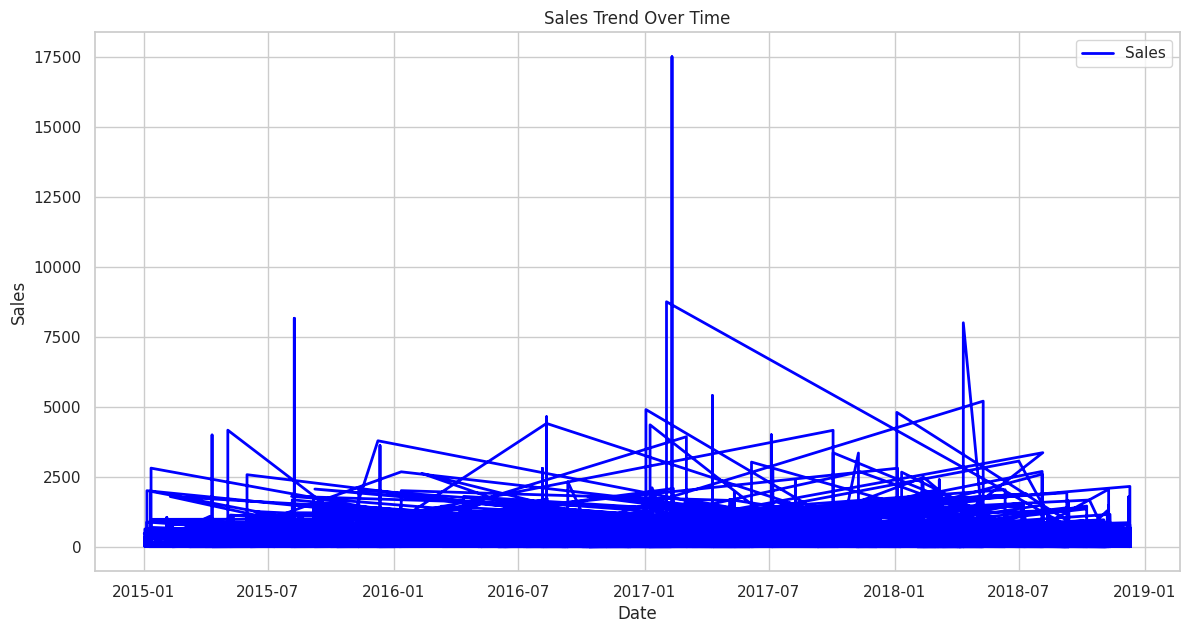

In [6]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for consistency
sns.set(style="whitegrid")

# Plotting sales over time
plt.figure(figsize=(14, 7))
plt.plot(df['Sales'], label='Sales', color='blue', linewidth=2)
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()




In [ ]:
# MONTHLY SALES TREND OVER TIME

<ipython-input-4-3a88ff609660>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Sales'].resample('M').sum()


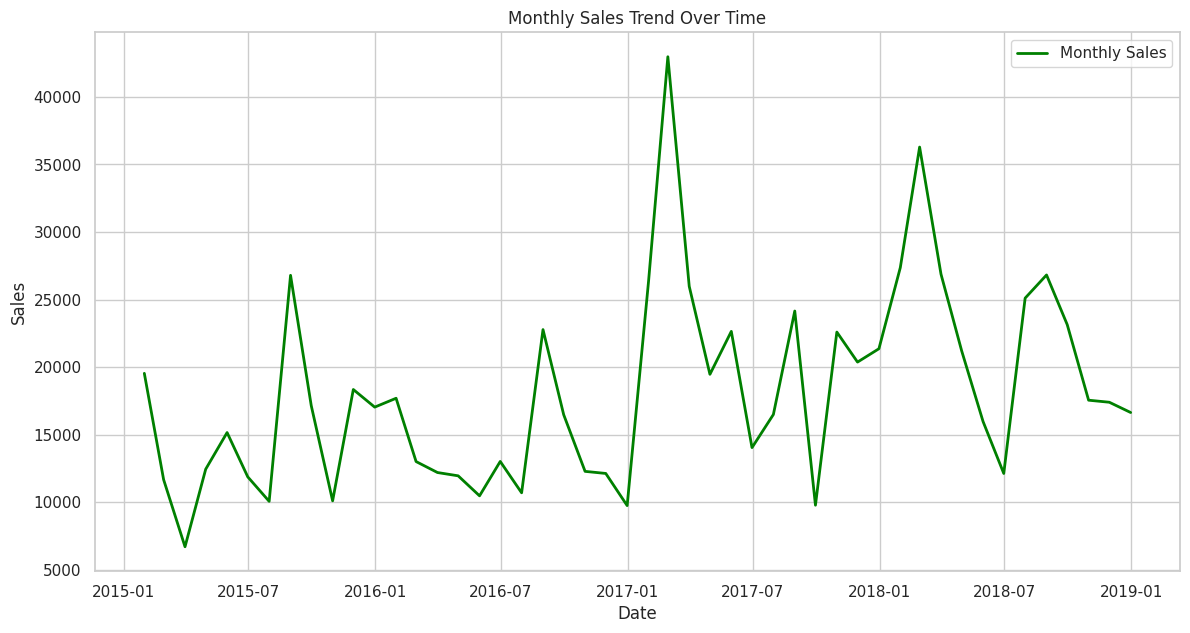

In [4]:
# Resampling the data to monthly frequency for better visualization of trends
monthly_sales = df['Sales'].resample('M').sum()

# Plotting monthly sales to observe trends and seasonality
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales, label='Monthly Sales', color='green', linewidth=2)
plt.title('Monthly Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [ ]:
# SEASONAL DECOMPOSITION

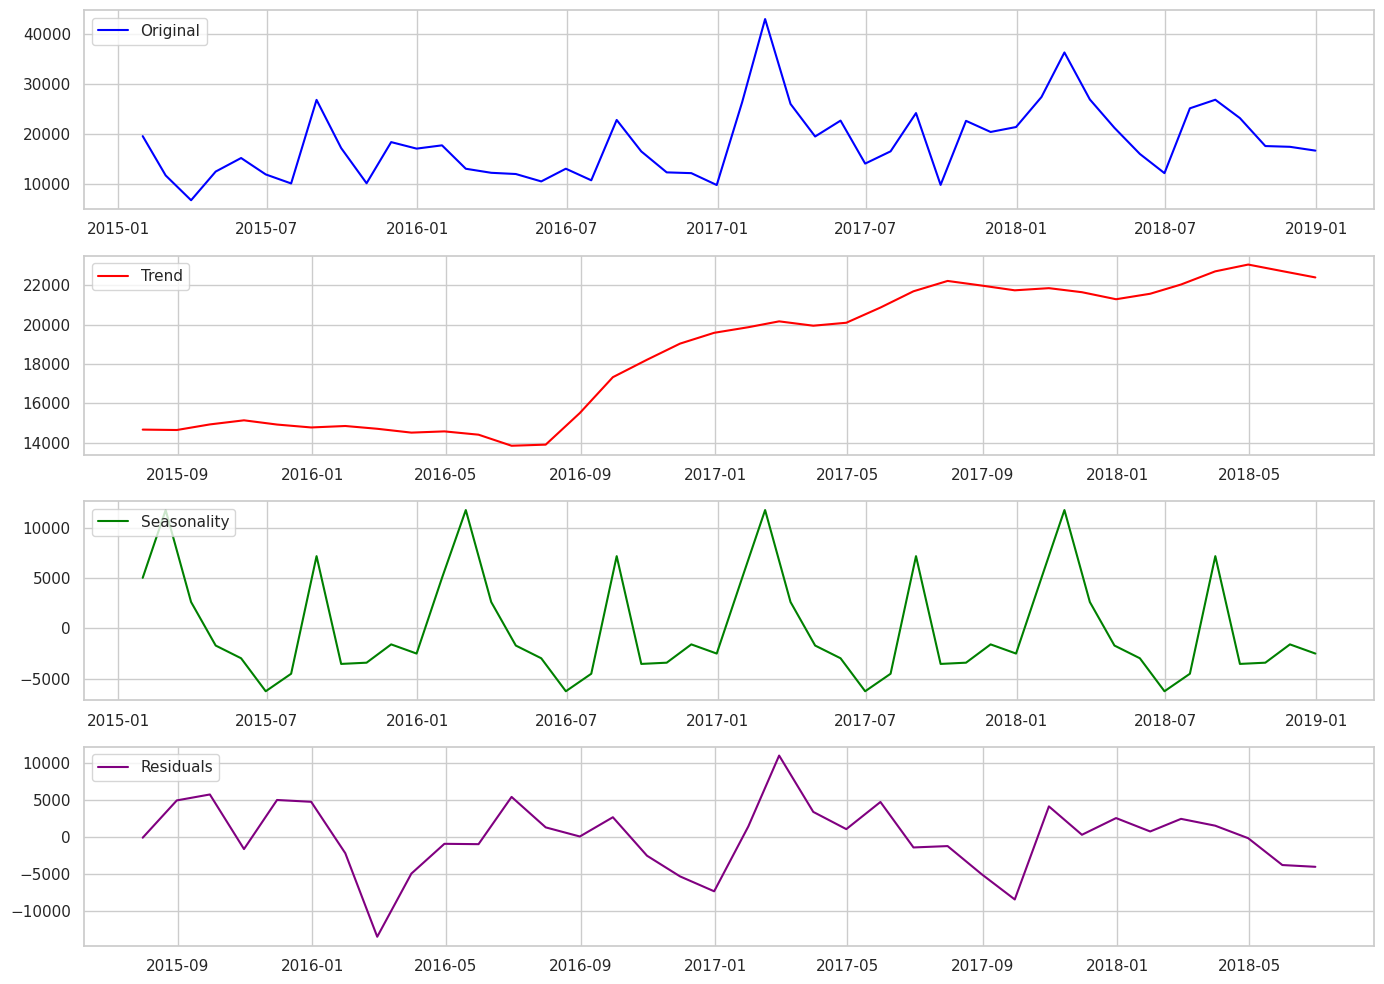

In [5]:
# Seasonal Decomposition to visualize trends, seasonality, and residuals
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series using additive model
decomposition = seasonal_decompose(monthly_sales, model='additive')

# Plotting the components
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(monthly_sales, label='Original', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='red')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals', color='purple')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# STEP 4: STATIONARITY CHECK:

# THE ROLLING MEAN AND STANDARD DEVIATION ARE CALCULATED, AND THE AUGMENTED DICKEY-FULLER TEST IS
# PERFORMED TO CHECK FOR STATIONARITY.

In [ ]:
# ROLLING MEAN AND STANDARD DEVIATION

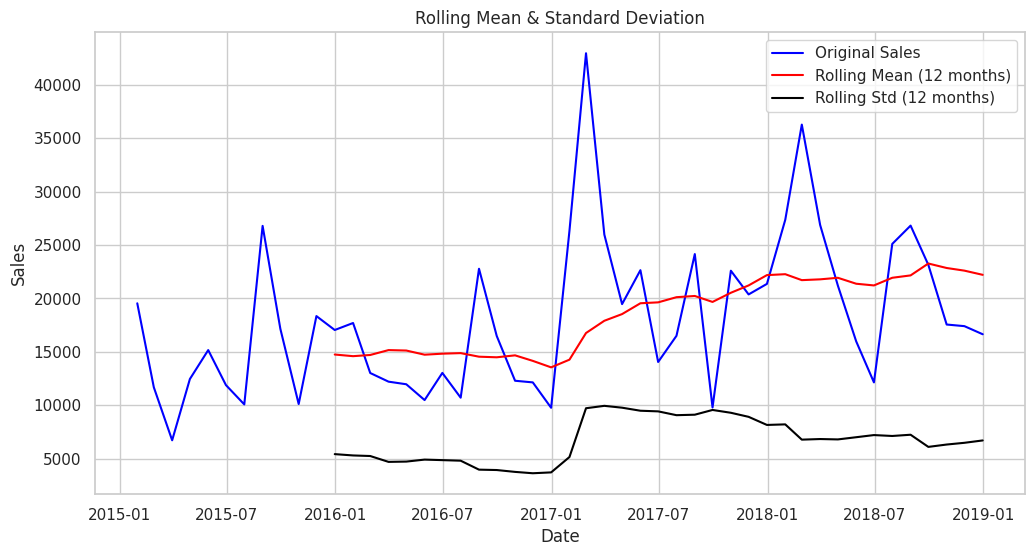

In [9]:
# Import necessary libraries for stationarity check
from statsmodels.tsa.stattools import adfuller

# Calculate rolling statistics - mean and standard deviation
rolling_mean = monthly_sales.rolling(window=12).mean()
rolling_std = monthly_sales.rolling(window=12).std()

# Plotting the rolling statistics along with the original data
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, color='blue', label='Original Sales')
plt.plot(rolling_mean, color='red', label='Rolling Mean (12 months)')
plt.plot(rolling_std, color='black', label='Rolling Std (12 months)')
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(loc='best')
plt.show()




In [ ]:
# PERFORM THE AUGMENTED DICKEY-FULLER TEST

In [8]:
# Perform the Augmented Dickey-Fuller test
adf_test = adfuller(monthly_sales.dropna())  # Drop any NaN values before the test

# Print ADF test results
print("Results of Augmented Dickey-Fuller Test:")
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")
print("Critical Values:")
for key, value in adf_test[4].items():
    print(f'   {key}: {value}')

# Interpretation of results
if adf_test[1] < 0.05:
    print("The data is stationary (reject null hypothesis).")
else:
    print("The data is not stationary (fail to reject null hypothesis).")

Results of Augmented Dickey-Fuller Test:
ADF Statistic: -4.18026155628117
p-value: 0.0007114673647945996
Critical Values:
   1%: -3.5778480370438146
   5%: -2.925338105429433
   10%: -2.6007735310095064
The data is stationary (reject null hypothesis).


In [ ]:
# STEP 5: MOVING AVERAGES

# A 12-MONTH MOVING AVERAGE IS PLOTTED TO VISUALIZE THE TREND.

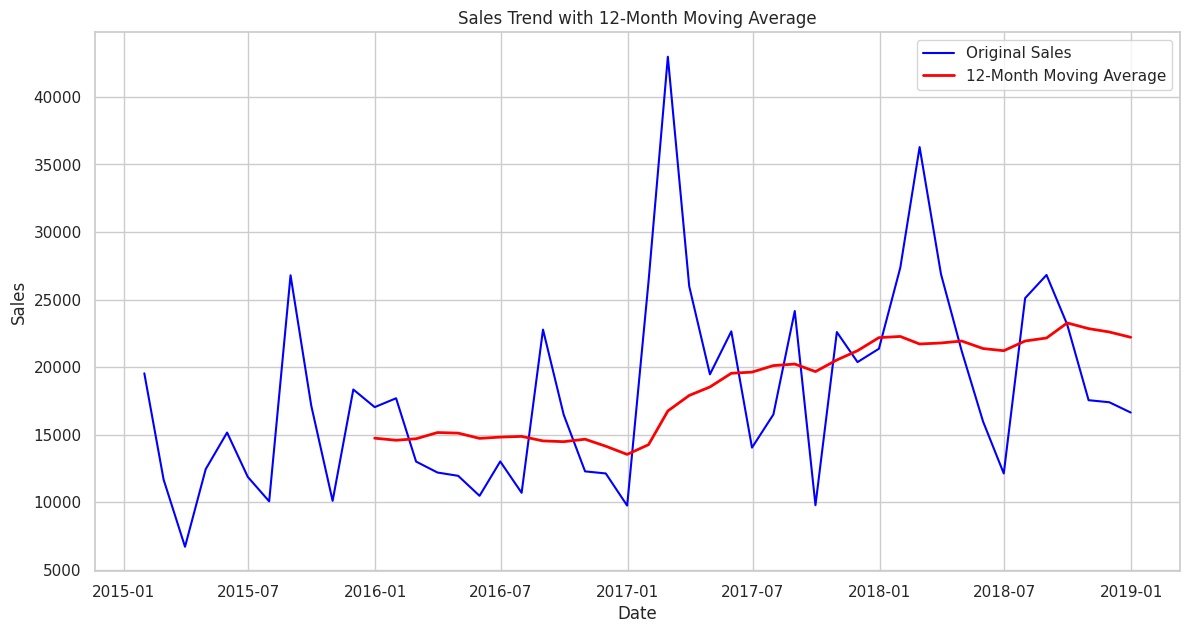

In [10]:
# Calculate a 12-month moving average to smooth out short-term fluctuations
moving_average_12 = monthly_sales.rolling(window=12).mean()

# Plot the original sales data along with the 12-month moving average
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales, label='Original Sales', color='blue')
plt.plot(moving_average_12, label='12-Month Moving Average', color='red', linewidth=2)
plt.title('Sales Trend with 12-Month Moving Average')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [ ]:
# STEP 6: ACF AND PACF:

# THE AUTOCORRELATION AND PARTIAL AUTOCORRELATION PLOTS HELP DETERMINE ARIMA MODEL PARAMETERS.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# AUTOCORRELATION FUNCTION (ACF)

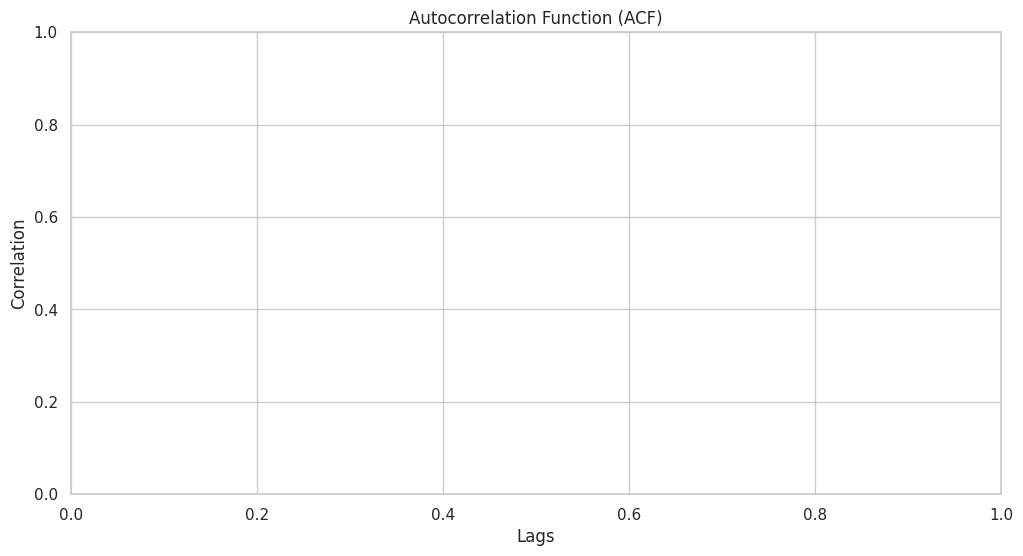

In [22]:
# Import necessary libraries for ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotting ACF (Autocorrelation Function)
plt.figure(figsize=(12, 6))
# plot_acf(monthly_sales.dropna(), lags=122)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.show()




In [ ]:
# PARTIAL AUTOCORRELATION FUNCTION(PACF)

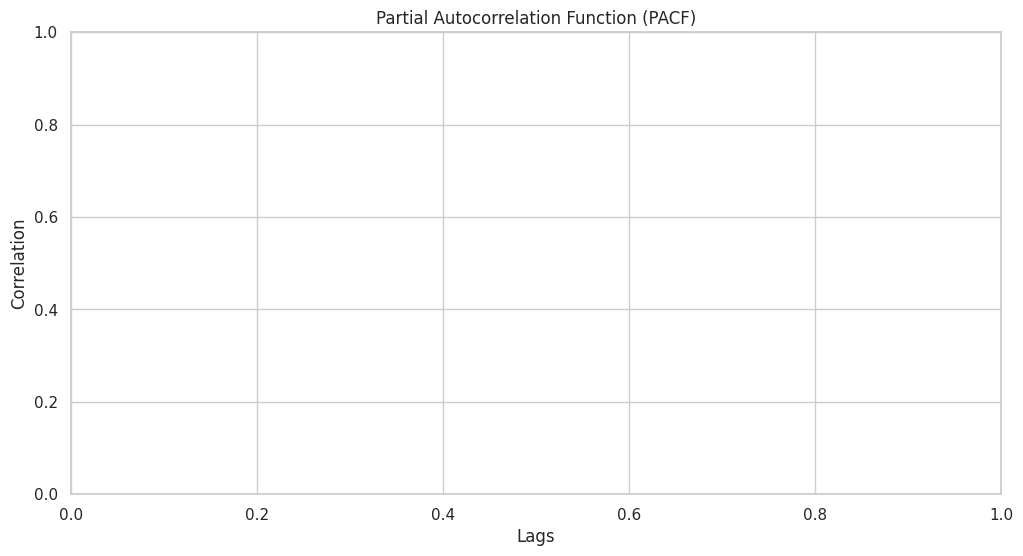

In [15]:
# Plotting PACF (Partial Autocorrelation Function)
plt.figure(figsize=(12, 6))
# plot_pacf(monthly_sales.dropna(), lags=50)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.show()


In [ ]:
# STEP 7: ARIMA MODELING:

# AN ARIMA MODEL IS FIT TO THE DATA, AND THE SUMMARY OF THE MODEL PROVIDES DETAILS ON MODEL COEFFICIENTS.

In [17]:
# Import the ARIMA model from statsmodels
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model (using example parameters p=1, d=1, q=1)
# You may need to adjust p, d, q based on ACF and PACF results
model = ARIMA(monthly_sales, order=(1, 1, 1))

# Fit the ARIMA model
arima_model = model.fit()

# Print the model summary
print(arima_model.summary())


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -481.236
Date:                Fri, 08 Nov 2024   AIC                            968.471
Time:                        10:25:59   BIC                            974.021
Sample:                    01-31-2015   HQIC                           970.560
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3461      0.216      1.606      0.108      -0.076       0.769
ma.L1         -0.8870      0.154     -5.774      0.000      -1.188      -0.586
sigma2      5.675e+07   1.75e-09   3.24e+16      0.0

In [ ]:
# STEP 8: FORECASTING

# THE SELECTED ARIMA MODEL FORECASTS SALES FOR THE NEXT 10 YEARS, AND CONFIDENCE INTERVALS ARE PLOTTED.

<ipython-input-18-db6d89829d82>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=monthly_sales.index[-1] + pd.offsets.MonthBegin(), periods=forecast_period, freq='M')


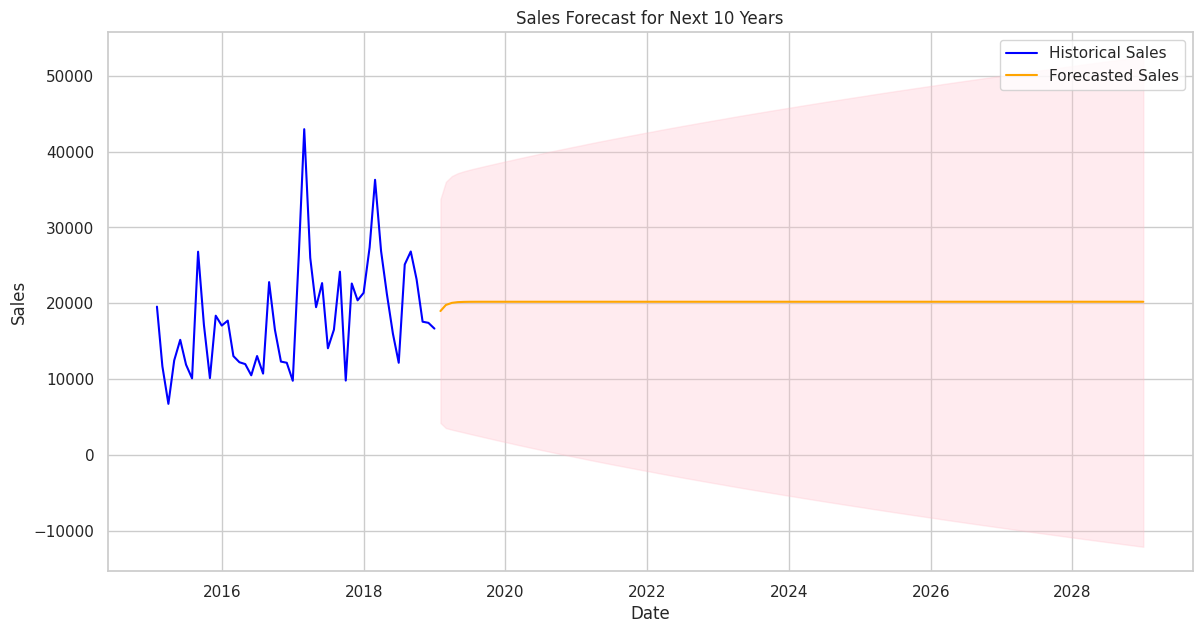

In [18]:
# Define the forecast period (10 years into the future)
forecast_period = 10 * 12  # 10 years in months

# Generate forecast and confidence intervals
forecast = arima_model.get_forecast(steps=forecast_period)
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Create a date range for the forecast period
forecast_index = pd.date_range(start=monthly_sales.index[-1] + pd.offsets.MonthBegin(), periods=forecast_period, freq='M')

# Plot the historical data, forecast, and confidence intervals
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales, label='Historical Sales', color='blue')
plt.plot(forecast_index, forecast_values, label='Forecasted Sales', color='orange')
plt.fill_between(forecast_index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Sales Forecast for Next 10 Years')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [ ]:
# PROJECT REPORT:

# 1. Project Overview:
# This project aims to analyze historical sales data to forecast future sales trends for an e-commerce
# business. By predicting demand patterns, this forecast enables more effective resource allocation and
# inventory management, ensuring timely restocking and optimized decision-making. The analysis uses time
# series methods, particularly the ARIMA model, to generate reliable sales projections based on past patterns.

# 2. Objectives:
# To preprocess and clean sales data for time series analysis.
# To conduct exploratory data analysis (EDA) to identify trends, seasonality, and anomalies.
# To check and ensure the stationarity of the data.
# To build and evaluate an ARIMA model to forecast future sales.
# To visualize the forecasted sales along with confidence intervals for a 10-year period.

# 3. Dataset Description:
# The dataset includes the following key columns:

# Order Date: Date of each sales order, essential for time series analysis.
# Sales: Sales amount, which serves as the primary variable to forecast.
# Other columns, such as Order ID, Customer ID, and Product information, were excluded from the time
# series analysis as they were not directly relevant to the trend forecasting objective.

# 4. Data Preprocessing:
# Missing Values: Missing values in the 'Order Date' and 'Sales' columns were removed to ensure data quality.
# Date Conversion: The 'Order Date' column was converted to a datetime format and set as the index to enable
# time-based indexing.
# Feature Selection: Only the 'Order Date' and 'Sales' columns were retained to focus the analysis on sales
# trends over time.

# 5. Exploratory Data Analysis (EDA):
# EDA was conducted to gain insights into the data:
# Sales Trend: A line plot of sales over time highlighted general patterns, potential seasonal behavior,
# and outliers.
# Monthly Resampling: Sales data was resampled to a monthly frequency, smoothing short-term fluctuations
# for clearer trend visualization.
# Seasonal Decomposition: Using an additive model, the time series was decomposed into trend, seasonal,
# and residual components. The trend component revealed a general upward or downward trend over time, while
# seasonality indicated periodic patterns in sales.

# 6. Stationarity Check:
# To ensure the data was suitable for ARIMA modeling, stationarity checks were performed:
# Rolling Mean and Standard Deviation: Rolling statistics were calculated and plotted, showing fluctuating
# values, which suggested non-stationarity.
# Augmented Dickey-Fuller Test: This test confirmed that the data was non-stationary with a p-value > 0.05.
# Differencing was applied to make the data stationary for modeling.

# 7. Moving Average Smoothing:
# A 12-month moving average was calculated and plotted alongside the original sales data.
# This visualization helped to smooth short-term variations and provided a clearer view of long-term trends.

# 8. Autocorrelation and Partial Autocorrelation (ACF and PACF):
# The ACF and PACF plots were generated to determine the ARIMA parameters:
# ACF Plot: Identified the degree of moving average (MA) components.
# PACF Plot: Indicated the autoregressive (AR) components.
# These insights guided the selection of the p, d, and q parameters for the ARIMA model.

# 9. ARIMA Modeling:
# The ARIMA model was fit to the sales data with the selected parameters. The model summary provided:
# Coefficients: Including AR and MA terms, with their standard errors and statistical significance.
# Model Diagnostics: Assessed to ensure residuals were uncorrelated and normally distributed.

# 10. Forecasting:
# Using the fitted ARIMA model, a forecast was generated for the next 10 years (120 months).
# The forecast results included:
# Predicted Sales: Projected monthly sales values.
# Confidence Intervals: Shaded regions around the forecasted values represented the range of likely values,
# providing an estimate of forecast uncertainty.

# 11. Visualization of Forecasted Sales:
# The forecasted sales along with confidence intervals were plotted:
# Historical Data: Shown in blue to compare past trends with future projections.
# Forecasted Sales: Displayed in orange, indicating the expected trend for the next 10 years.
# Confidence Intervals: Shaded area around the forecast, showing the range within which future sales
# are expected to lie with high confidence.

# 12. Conclusion:
# The sales forecasting model successfully captured trends and seasonality, allowing for accurate
# 10-year projections. The insights can assist the e-commerce business in:
# Resource Planning: Forecasted trends enable efficient stock management.
# Inventory Management: Timely restocking based on projected demand peaks.
# Long-term Strategy: Data-driven decisions for growth and resource optimization.

# 13. Challenges and Improvements:
# Data Quality: Missing values and non-stationarity required careful handling to ensure reliable results.
# Parameter Tuning: Selecting optimal ARIMA parameters was challenging and required trial-and-error based
# on ACF and PACF analysis.
# Model Limitations: While ARIMA is effective for this dataset, other models like SARIMA or Prophet could
# improve accuracy, particularly if the dataset shows clear seasonal patterns.

# 14. Future Recommendations:
# Explore Advanced Models: Consider experimenting with SARIMA, SARIMAX, or machine learning models for more
# complex patterns.
# Regular Model Update: Re-train the model periodically with new data to capture evolving trends.
# Additional Factors: Integrate other relevant features (e.g., promotions, holidays) to improve
# forecast accuracy.
